# Model Development

### Objectives:

   - Develop prediction models
 
In this task, I'll develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

#### Some questions I answered in this module

   - Do I know if the dealer if offering fair value for my trade-in?
   - Do I know if I put a fair value on my car?
   
In data analytics, we often use <b>Model Development</b> to help us predict future observation from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\Python Learning\pandas-project\Data Analysis with python\Task 3 Model Development Car Pricing\automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

# 1. Linear Regression and Multiple Linear Regression


#### Linear Regression
##### Simple Linear Regression


Simple Linear Regression is a method to help us understand the relationship betwen two variables:

   - The predictor/independent variable (X)
   - The response/dependent variable (that we want to predict)(Y)
   
The result of Linear Regression is that predicts the response (dependent) variable as a function of the predictor (independent) variable.
         
         
$$
 Y: Response \ Variable\\\\\\
 X: Predictor \ Variables
$$    
 

##### Linear Function

$$
Y = a + b  X
$$

         
   - a refers to the <b>intercept</b> of the regression line: the value of Y when X is 0
   - b refers to the <b>slope</b> of the regression line: the value with which Y changes when X increases by 1 unit


In [4]:
# Let's load the modules for the linear regression

from sklearn.linear_model import LinearRegression

In [14]:
# Create a linear regression object
lm = LinearRegression()
lm

LinearRegression()

#### How could "highway-mpg" help us predict car price?

In [24]:
X = df[['highway-mpg']]
Y = df['price']

# Fit the linear model using highway-mpg

lm.fit(X,Y)

LinearRegression()

In [15]:
# We can output a prediction

Yhat = lm.predict(X)
# Yhat    print whole output
Yhat[0:4]  # Print first four output

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

### What is the value of the intercept(a) ?

In [16]:
lm.intercept_

38423.305858157386

#### What is the value of slope (b) ?

In [18]:
lm.coef_

array([-821.73337832])

#### What is the final estimated linear model we get?

As we saw above, we should get a final linear model with the structure:

    Yhat = a + bX
    
Price = 38423.31 - 821.73 * highway-mpg

# Question :
####  1 a) Create a linear regression object called 'lm1'.

In [13]:
lm1 = LinearRegression()
lm1

LinearRegression()

#### 1 b) Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [37]:
P = df[['engine-size']]
Q = df['price']

lm1.fit(P,Q)

Yhat1 = lm1.predict(P)
Yhat1[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

#### 1 c) Find the slope and intercept of the model.



In [24]:
# Slope

s1 = lm1.coef_ 

# Intercept

I1 = lm1.intercept_


print("Slope is: ",s1)
print("Intercept is: ",I1)


Slope is:  [166.86001569]
Intercept is:  -7963.338906281042


#### 1 d) What is the equation of the predicted line? 

In [25]:
# Yhat = a + bX

Yhat = 166.86 * P - 7963.34

# where P = df[['engine-size']]

Price = 166.86 * df[['engine-size']] - 7963.34


# Multiple Linear Regression

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$

The equation is given by

$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


From the previous section we know that other good predictors of price could be:

   - Horsepower
   - Curb-weight
   - Engine-size
   - Highway-mpg
   
Let's develop model using these variables as the predictor variables.

In [55]:
A = df[['horsepower','curb-weight','engine-size','highway-mpg']]
B = df['price']

lm.fit(A,B)


LinearRegression()

In [27]:
# What is the value of intercept (a)?
lm.intercept_

-15806.624626329205

In [28]:
# What is the value of coefficients b1,b2,b3,b4 ?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

As we saw above, we should get a final linear function with the structure
$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


So, what is the linear function we get in this example?

Price = -15806.62 + 53.4957 * <b>horsepower</b> + 4.7077 * <b>curb-weight</b> + 81.53 * <b>engine-size</b> + 36.0575 * <b>highway-mpg</b>

# Question 2

#### 2 a) Create and train a Multiple Linear Regression model 'lm2' where the response variable is 'price' and the predictor variable is 'normalized-losses' and 'highway-mpg'

In [31]:
# lm.fit(X,Y)
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

#### 2b) Find slope and intercept of the model

In [33]:
# slope

lm2.coef_

array([   1.49789586, -820.45434016])

In [34]:
lm2.intercept_

38201.31327245727


Price = 38201.3133 + 1.497896 * <b>normalized-losses</b> - 820.4543 * <b>highway-mpg</b>

In [36]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Model Evaluation using Visualization

#### Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is using regression plots.

<p>This plot will show a combination of a scattered data points (a <b>scatterplot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 48154.07903013073)

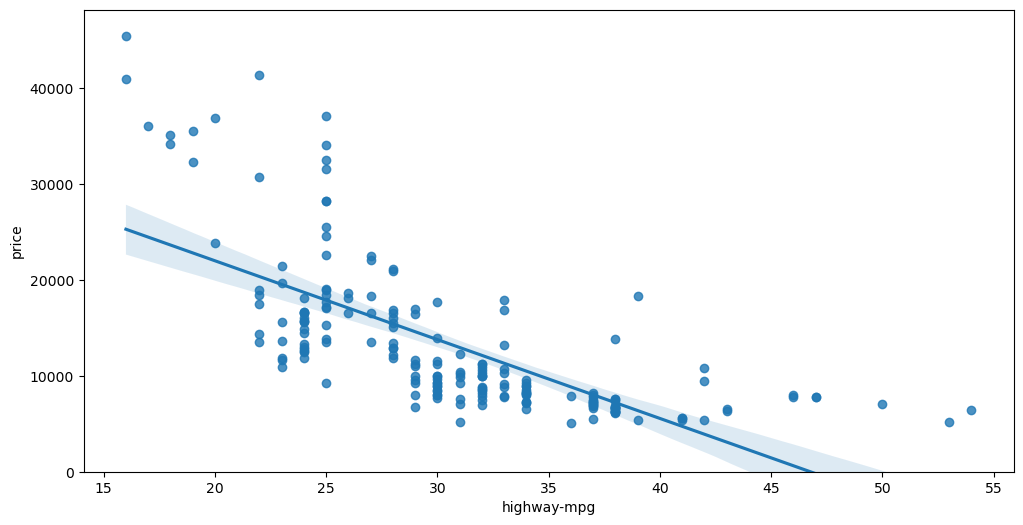

In [52]:
plt.figure(figsize=(12,6))
sns.regplot(x='highway-mpg',y='price',data = df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression plot is negative.


<b>Note</b>: When looking at regression plot, pay attention how scattered the data points are around the regression line. This give a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data  is too far off from the line, this linear model might not be the best model for this data.

(0.0, 47414.1)

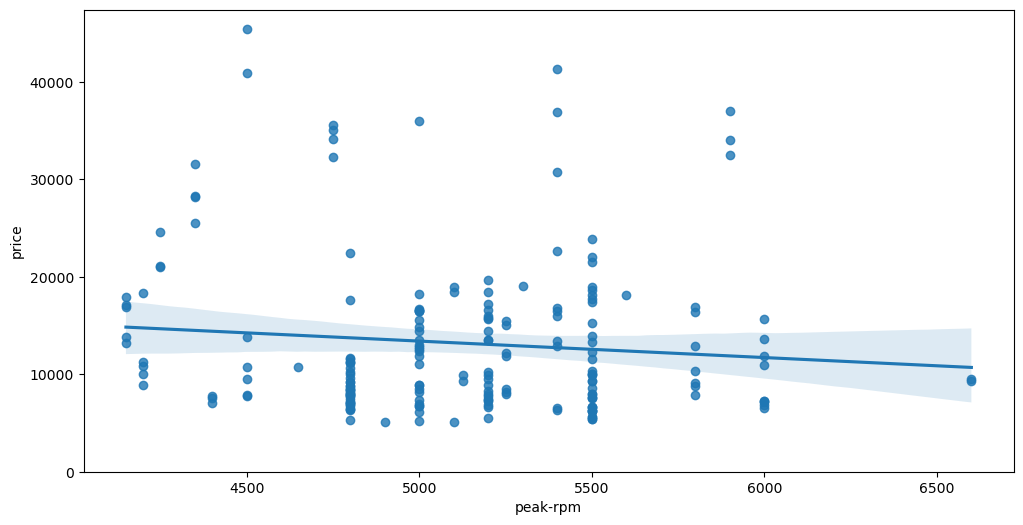

In [51]:
# Let's compare this plot to the regressoin plot of 'peak_rpm'
plt.figure(figsize=(12,6))
sns.regplot(x='peak-rpm',y='price',data = df)
plt.ylim(0,)

Comparing the regression plot of 'peak-rpm' and 'highway-mpg', we see that the points for 'highway-mpg' are much closer to the generated line and on average, decrease. The points for 'peak-rpm' have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the 'peak-rpm' increases.

# Question 3

#### Given the regression plots above, is 'peak-rpm' or 'highway-mpg' more strongly correlated with 'price'? Use the method '.corr()' to verify your answer.

In [41]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

## Residual Plot

A good way to visualize the variance of the data is to use a residual plot

What is <b>residual</b>?

The difference between observed value (y) and the predicted value(Yhat) is called the residual. When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A <b>residual plot</b> is a graph that shows the residuals on the vertical y-axis and independent variable on the horizontal x-axis.

   - If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data

Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

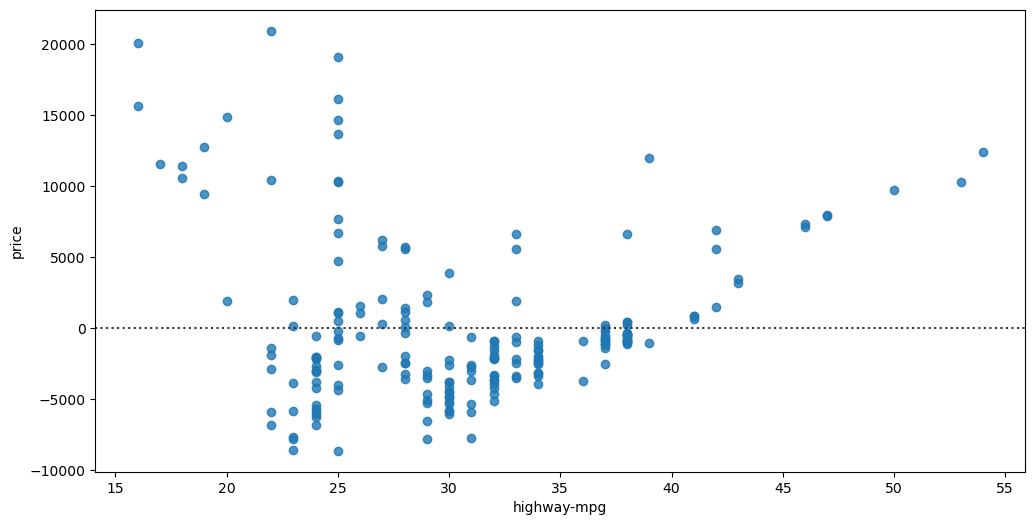

In [50]:
plt.figure(figsize=(12,6))

sns.residplot(x='highway-mpg',y='price',data=df)
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

## Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression?

One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [56]:
# Let's make the prediction

Y_hat = lm.predict(A)
Y_hat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

C:\Users\Aayush\AppData\Local\Temp\ipykernel_9720\3006648679.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Aayush\AppData\Local\Temp\ipykernel_9720\3006648679.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

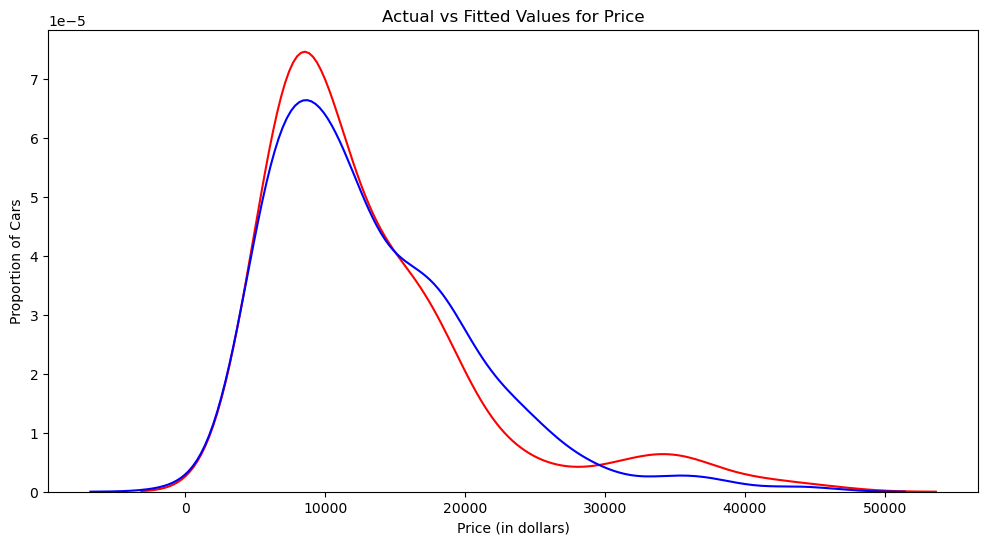

In [57]:
plt.figure(figsize=(12, 6))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room form improvement..

# Polynomial Regression and Pipelines

<b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor values.

There are different orders of polynomial regression.

<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


We saw earlier that a linear model did not provide the best fit while using 'highway-mpg' as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [60]:
def Polyplot(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Lenght')
    ax =plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [17]:
# let's get the variable
x=df['highway-mpg']
y=df['price']

In [39]:
# Lets fit the polynomial using function polyfit, then use the funtion poly1d to display the polynomial function

f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


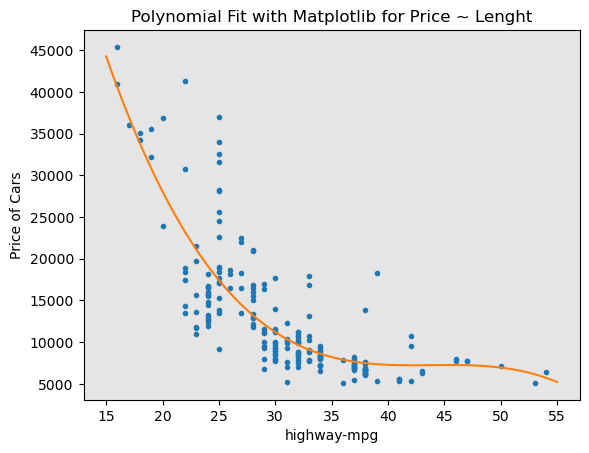

In [61]:
Polyplot(p,x,y,'highway-mpg')

In [62]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function 'hits' more of the data points.

# Question 4

#### Create 11 order polynomial model with the variables x andy from above

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


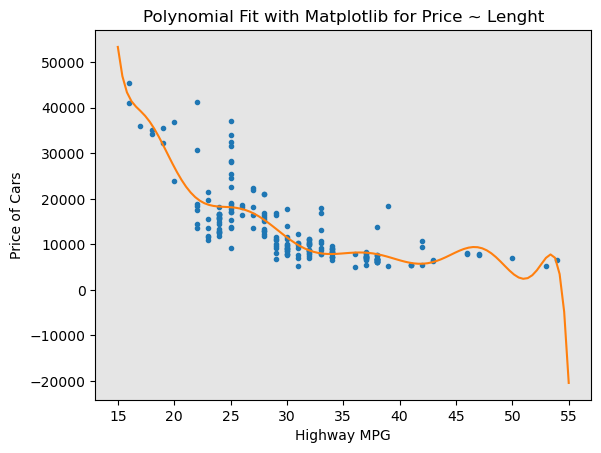

In [64]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
Polyplot(p1,x,y,'Highway MPG')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

We can perform a polynomial transform on multiple features. First, we import the module:


In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
# We can create PolynomialFeatures object of degree 2

pr = PolynomialFeatures(degree = 2)
pr


PolynomialFeatures()

In [67]:
A_pr = pr.fit_transform(A)

In [68]:
A.shape

(201, 4)

In [69]:
A_pr.shape

(201, 15)

In original data, there are 201 samples and 4 features.

After transformation, there are 201 samples and 15 features.

# Pipeline

Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create the pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.

We can create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias = False)),('model',LinearRegression())]

In [7]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the datatype of A to type float toa avoid conversion warning that may appears as a result of StandardScalar taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [18]:
A = A.astype(float)
pipe.fit(A,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [19]:
ypipe = pipe.predict(A)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

# Question 5

### Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using features A nad target y.

In [21]:
Input = [('scale',StandardScaler()),('model',LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(A,y)

ypipe = pipe.predict(A)
ypipe[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

# Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the result, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

   - R^2 / R-squared
   - Mean Square Error (MSE)
   
##### R-squared

R-squared, also known as the coefficient of determination, is a measure to indicate how close the data is to fitted regression line.

The value of the R-squared is the percentage fo variation of the response variable (y) htat is explained by a linear model.

##### Mean Squared Error (MSE)

The Mean Square Error measures the average of the squares of errors, i.e. the difference between actual value(y) and the estimated value.

## Model 1: Simple Linear Regression



Let's calculate the R^2



In [25]:
# highway-mpg_fit

lm.fit(X,Y)
# find the R^2
print('The R-square is: ',lm.score(X,Y))

The R-square is:  0.4965911884339175


We can say that ~49.659% of the variation of the price is explained by this simple linear model 'horsepower_fit'.


Let's calculate MSE:

We can predict the output 'yhat' using the predict method, where X is input variable.

In [26]:
Yhat = lm.predict(X)

print('The output of first four predicted value is : ',Yhat[0:4])

The output of first four predicted value is :  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Let's import the function <b>mean_square_error</b> from the module metrics:

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mse = mean_squared_error(df['price'],Yhat)

print('The mean square error of price and predicted value is :',mse)

The mean square error of price and predicted value is : 31635042.944639895


## Model 2: Multiple Linear Regression

Let's calculate R^2


In [30]:
# fit the model
lm.fit(A,df['price'])

# find R^2
print('The R-square is: ',lm.score(A,df['price']))

The R-square is:  0.8093562806577458


We can say that ~80.935 % of the variation of price is explained by this multiple linear regression 'multi_fit'

Let's calculate the MSE

In [33]:
y_predict_multifit = lm.predict(A)

y_predict_multifit[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

In [34]:
mse2 = mean_squared_error(df['price'],y_predict_multifit)

print('The mean square error of price and predicted value using multifit is: ',mse2)

The mean square error of price and predicted value using multifit is:  11980366.870726489


## Model 3: Polynomial Fit

Lets calculate the R^2

Let's import the function r2_score from the module metrics as we are using different function.


In [35]:
from sklearn.metrics import r2_score

In [40]:
# We apply this function to get the value of R^2

r_squared = r2_score(y,p(x))

print('The R-square value is: ',r_squared)

The R-square value is:  0.6741946663906516


We can say that ~67.419% of the variation of price is explained by this polynomial fit


<b>MSE</b>

In [41]:
mean_squared_error(df['price'],p(x))

20474146.42636123

# Prediction and Decision Making

### Prediction
In the previous section, we trained the model using the method fit. Now we will use the method <b>predict</b> to produce a prediction. Let's import <b>pyplot</b> for plotting; we will also be using some function from numpy.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [44]:
# Create a new input
new_input=  np.arange(1,100,1).reshape(-1,1)

In [45]:
# fit the model
lm.fit(X,Y)
lm

LinearRegression()

In [47]:
# Produce a prediction

yhat = lm.predict(new_input)
yhat[0:5]

C:\Users\Aayush\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

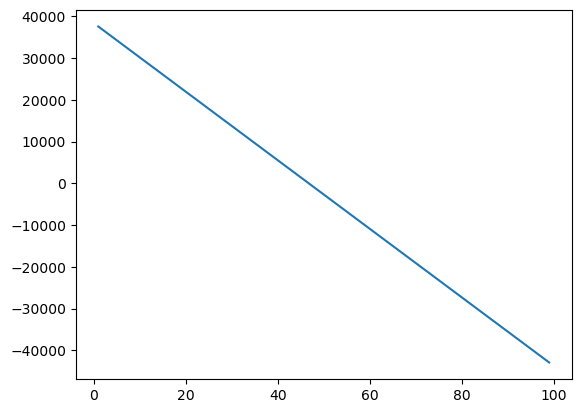

In [48]:
# plot the data
plt.plot(new_input,yhat)
plt.show()

## Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

   - What is a good R-squared value?
   
What comparing models, the model with the higher R-squared value is a better fit for the data.

   - What is a good MSE?

When comparing models, the model with the smallest MSE value is better fit for the data.


##### Let's take a look at the values for the different models.

<b>Simple Linear Regression</b>: Using Highway-mpg as a Predictor Variable of Price

   - R-squared: 0.4965911884339175
   - MSE : 31635042.944639895 or 3.16 x 10^7
   
<b>Multiple Linear Regression</b>: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variabales of Price

   - R-squared: 0.8093562806577458
   - MSE : 11980366.870726489
   
<b>Polynomial Fit</b>: Using Highway-mpg as a Predictor Variable of price

   - R-sqaured: 0.6741946663906516
   - MSE: 20474146.42636123

## Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

Usually, the mor variables we have, the better our model is at predicting, but this is not always true. Sometimes we may not have enough data, we may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, we should always check the MSE and R^2

In order to compare the result of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

   - <b>MSE</b>: The MSE of SLR is 3.16 x 10^7 while MLR has an MSE of 1.2 x 10^7. The MSE of MLR is much smaller.
   - <b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and MLR. The R-squared for the SLR (~ 0.497) is very small compared to R-squared for MLR (~0.809).
   
This R-squared in combination with MSE shows that MLE seems like the better model fit in this case compared to SLR.

## Simple Linear Regression Model (SLR) vs Polynomial Fit


   - <b>MSE</b>: We can see that Polynomial Fit brought down MSE, since this MSE is smaller than the one from SLR.
   - <b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
   
Since, the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicing 'price' with 'highway-mpg' as a predictor varaible.

## Multiple Linear Regression Model (MLR) vs Polynomial Fit


   - <b>MSE</b>: The MSE for the MLR is smaller than the MSE for the polynomial Fit.
   - <b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.
   

# Conclusion

Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final automobile price.

## Thank you for your time!!